Importing libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Aerofit CSV file

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
df = pd.read_csv("/content/aerofit_treadmill.csv?1639992749")
df

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 30.8MB/s]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#**Section 1 . Defining Problem Statement and Analysing basic metrics (10 Points)**

# Defining Problem statement

We wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#Section 1.1 Basic Analysis

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There is no missing Values and there is no requirement to change any data type of any variable

In [ ]:
# statistical Summary of categorical data
df.describe( include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


After analysing statistical Summary of categorical data, i can conclude:
1. There are 3 unique types of products in which KP281 have the highest sale
2. Male purchase the product more frequently than female
3. Most of the customers are married

In [ ]:
# statistical Summary of numerical data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#**Section 2 Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)**

Value Count of different types Of Products

In [ ]:
product_counts = df['Product'].value_counts()
print(product_counts)
print()
# Calculate the percentage of males and females
total_count = len(df)
print("KP281 entry-level treadmill {}%".format(100*(product_counts['KP281'] / total_count).round(3)))
print("KP481 mid-level runners treadmill {}%".format(100*(product_counts['KP481'] / total_count).round(3)))
print("KP781 treadmill with advanced features {}%".format(100*(product_counts['KP781'] / total_count).round(3)))

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

KP281 entry-level treadmill 44.4%
KP481 mid-level runners treadmill 33.300000000000004%
KP781 treadmill with advanced features 22.2%


Value count of Male and Female

In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print()
# Calculate the percentage of males and females
total_count = len(df)
print("Percentage of Male Customer is {}%". format(100*(gender_counts['Male'] / total_count).round(3)))
print("Percentage of Female Customer is {}%". format(100*(gender_counts['Female'] / total_count).round(3)))

Male      104
Female     76
Name: Gender, dtype: int64

Percentage of Male Customer is 57.8%
Percentage of Female Customer is 42.199999999999996%


Value count of Married and Single Customers

In [ ]:
marital_status = df['MaritalStatus'].value_counts()
print(marital_status)
print()
# Calculate the percentage of Partnered and Single
total_count = len(df)
print("Percentage of Married customers is {}%". format(100*(marital_status['Partnered'] / total_count)))
print("Percentage of Single customers is {}%".format(100*(marital_status['Single'] / total_count)))

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Percentage of Married customers is 59.44444444444444%
Percentage of Single customers is 40.55555555555556%


*******Section 3 is after section 4*******

#**Section 4 Missing Value & Outlier Detection (10 Points)**

#Checking for Missing Values

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
IMiles           0
dtype: int64

There where no Missing values

#Checking for Outliers

**Box plot of Age find outliers**

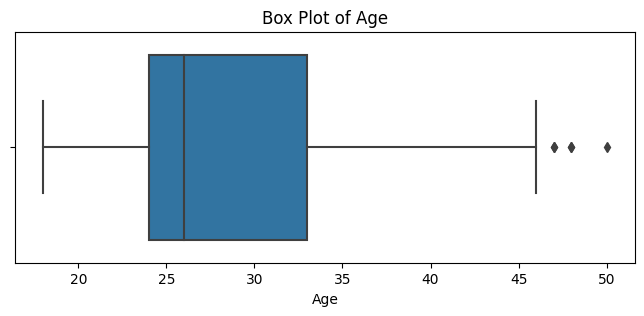

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x="Age", data = df)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

We detect few outliers in age, we need to treat this.

In [ ]:
# Outlier treatment for Age
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3-q1
upperlimit = q3+(1.5*iqr)
lowerlimit = q1-(1.5*iqr)
#create function for condition
def limit_imputer(value):
  if value > upperlimit:
    return upperlimit
  if value < lowerlimit:
    return lowerlimit
  else:
    return value
# Apply def
df["Age"] = df["Age"].apply(limit_imputer)

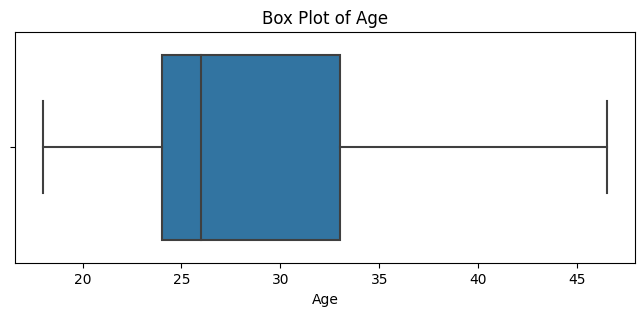

In [ ]:
#boxplot of age
plt.figure(figsize=(8, 3))
sns.boxplot(x="Age", data = df)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

**Boxplot of Income to find outlier**

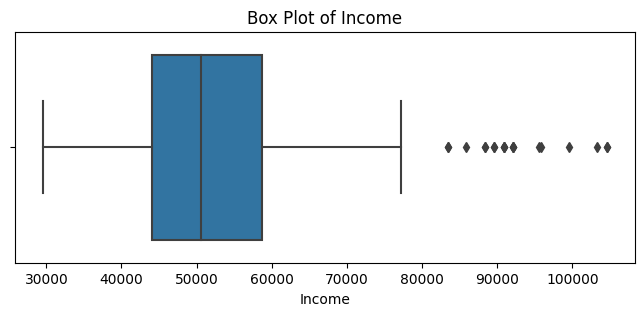

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x="Income", data = df)
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

In [ ]:
# Outlier treatment for Income
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
iqr = q3-q1
upperlimit = q3+(1.5*iqr)
lowerlimit = q1-(1.5*iqr)
#create function for condition
def limit_imputer(value):
  if value > upperlimit:
    return upperlimit
  if value < lowerlimit:
    return lowerlimit
  else:
    return value
# Apply def
df["Income"] = df["Income"].apply(limit_imputer)

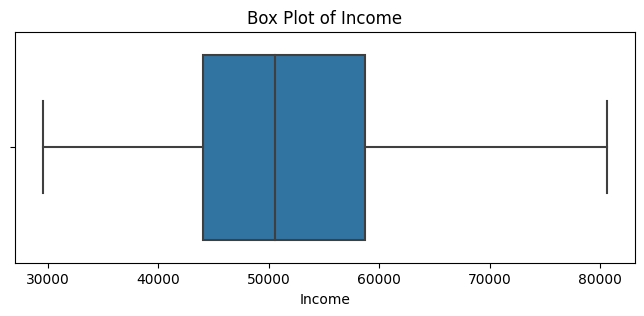

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x="Income", data = df)
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

** Boxplot of Miles to find Outliers

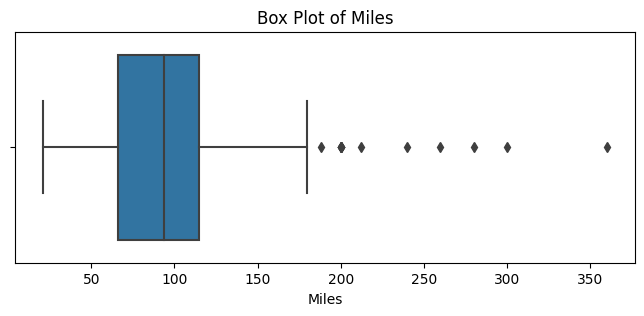

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x= "Miles", data = df)
plt.xlabel('Miles')
plt.title('Box Plot of Miles')
plt.show()

In [ ]:
# Outlier treatment for Miles
q1 = df["Miles"].quantile(0.25)
q3 = df["Miles"].quantile(0.75)
iqr = q3-q1
upperlimit = q3+(1.5*iqr)
lowerlimit = q1-(1.5*iqr)
#create function for condition
def limit_imputer(value):
  if value > upperlimit:
    return upperlimit
  if value < lowerlimit:
    return lowerlimit
  else:
    return value
# Apply def
df["Miles"] = df["Miles"].apply(limit_imputer)

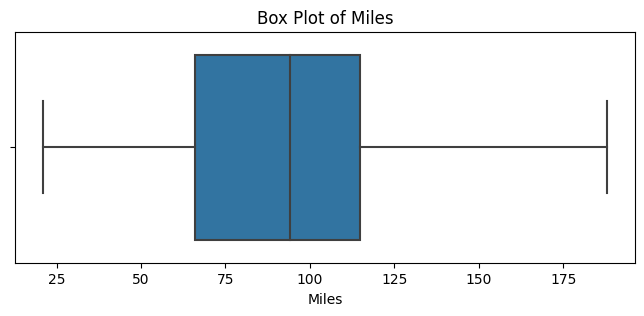

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x= "Miles", data = df)
plt.xlabel('Miles')
plt.title('Box Plot of Miles')
plt.show()

Outliers of miles are checked and Treated

Box plot for all the Variables that can have Outliers are checked and treated

#**Section 3 Visual Analysis - Univariate & Bivariate (30 Points)**

#Section 3.1 For continuous variable(s): Part 1  Univariate


Histogram of Age to find the highest frequency of Customer Age Range

<ipython-input-14-a690ce645fe7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


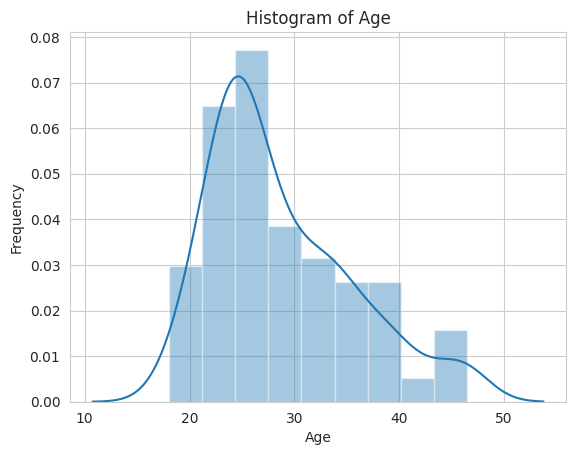

In [ ]:
# Assuming your data is in a DataFrame called 'df'
sns.distplot(df["Age"])

# Add labels and a title for better visualization
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Age')

# Display the plot
plt.show()

##Person in age range 22-28 have the highest tendency to purchase the Product

Histogram of Income to find the range of income where Max Customer Lie

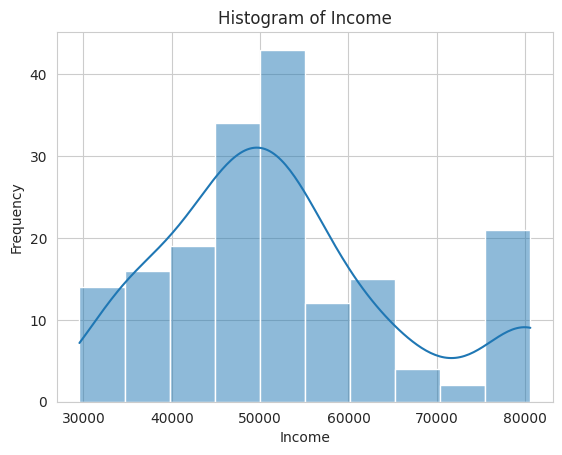

In [ ]:
# Assuming your data is in a DataFrame called 'df'
sns.histplot(df["Income"], kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')


plt.show()

Custome having Income range in between 45-55 have the highest tendency to purchase the product.
Exceptionally person having income approx 80K also have the equal tendency to purchase the product

<ipython-input-19-fbf5f030f081>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Usage"])


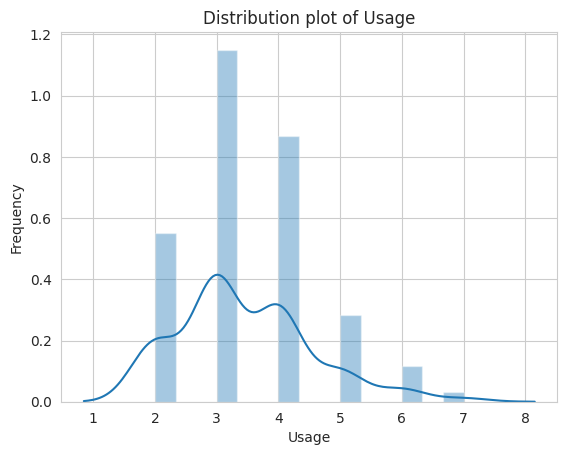

In [ ]:
sns.distplot(df["Usage"])
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.title('Distribution plot of Usage')




plt.show()

Customer who mention the usage as 2,3,4 have the highest tendency to by the product

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------

#Section 3.1 For continuous variable(s): Part 2  Bivariate

Bivariate box plot of gender vs Income

Text(0.5, 1.0, 'Box Plot of Income By Gender')

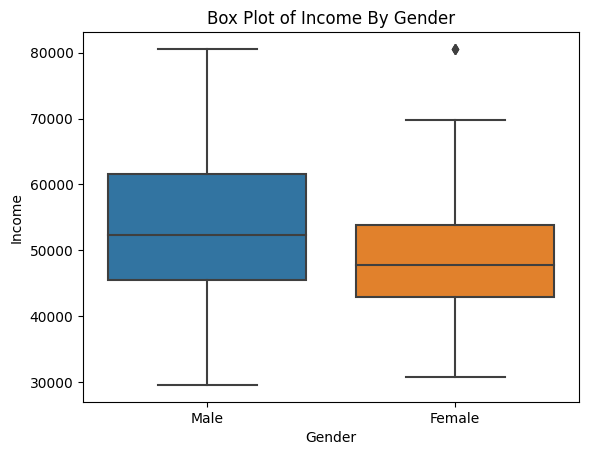

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df)
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Box Plot of Income By Gender')

**Male Income** 75%tile Income of Male customer is approx 62 K and mean Income is approx 52K

**Female Income** 75%tile Income of Female customer is approx 53K and mean Income is approx 46K

Countplot of Gender vs Products

Text(0.5, 1.0, 'Clustered Bar Chart of Gender by Products')

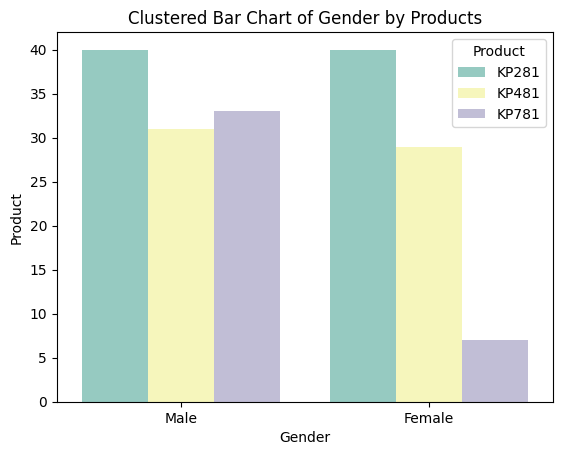

In [ ]:
sns.countplot(x='Gender', hue='Product', data=df, palette='Set3')
plt.xlabel('Gender')
plt.ylabel('Product')
plt.title('Clustered Bar Chart of Gender by Products')

A Male customer have highest tendency to buy KP281, and approx equal tendency to buy KP418 and  KP718.

A Female have the highest tendency to buy KP281, a bit lower tendency to buy KP418 and very least tendency to buy KP718.

Countplot of Usage vs Product

Text(0.5, 1.0, 'Clustered Bar Chart of usage by Products')

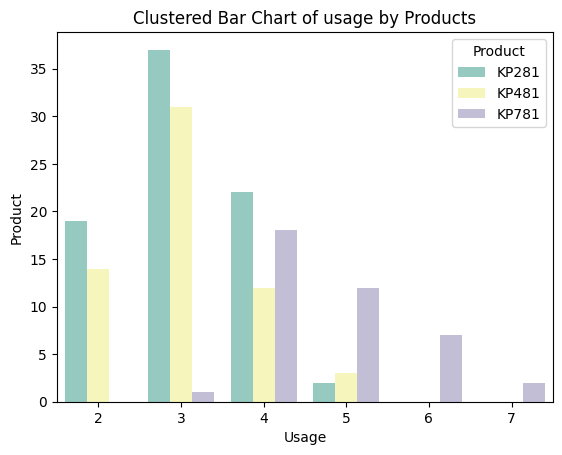

In [ ]:
sns.countplot(x='Usage', hue='Product', data=df, palette='Set3')
plt.xlabel('Usage')
plt.ylabel('Product')
plt.title('Clustered Bar Chart of Usage by Products')

Customer who plans to use the treadmill 2 or 3 times a week, there is very high probability the they will buy KP281 or KP481.

If customer planning to use treadmill 4 times a week there is approx equal probability that they will buy KP281 or KP781. Comparatively low tendency to buy KP481.

If customer wanted to use the treadmill 5, 6 or 7 times a week are mor likely to buy Kp781

**********************************************
**Countplot of Fitness vs product**
**********************************************

Text(0.5, 1.0, 'Clustered Bar Chart of usage by Products')

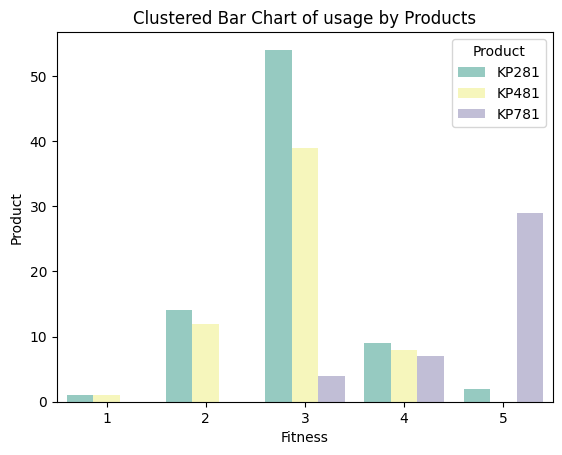

In [ ]:
sns.countplot(x='Fitness', hue='Product', data=df, palette='Set3')
plt.xlabel('Fitness')
plt.ylabel('Product')
plt.title('Clustered Bar Chart of usage by Products')

Text(0.5, 1.0, 'Clustered Bar Chart of MaritalStatus by Products')

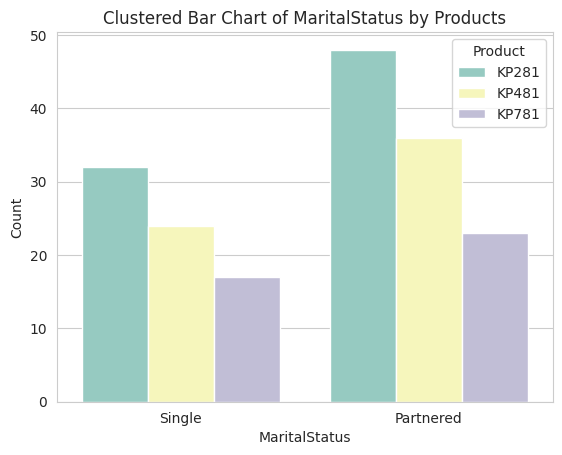

In [ ]:
sns.countplot(x='MaritalStatus', hue='Product', data=df, palette='Set3')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('Clustered Bar Chart of MaritalStatus by Products')

Text(0.5, 1.0, 'Clustered Bar Chart of Gender by Products')

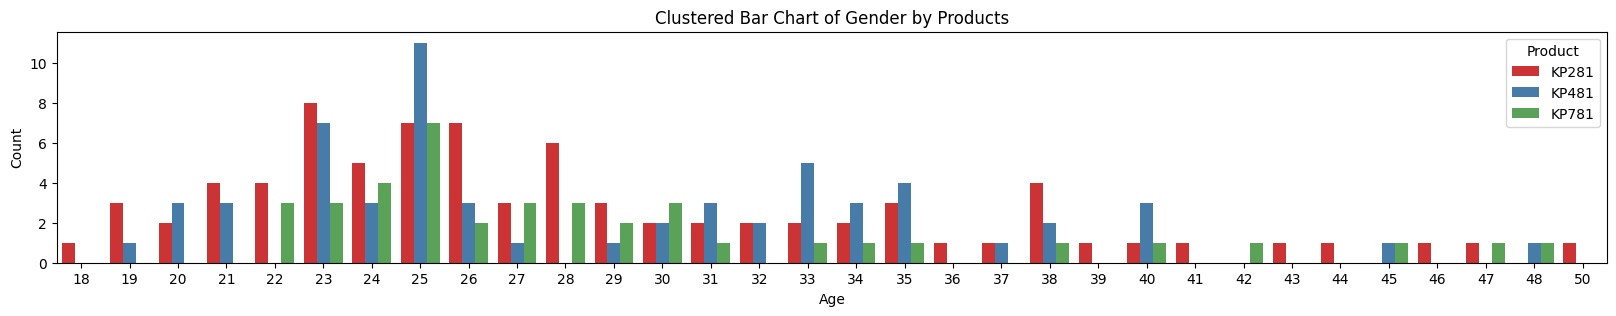

In [ ]:
plt.figure(figsize=(20, 3))
sns.countplot(x='Age', hue='Product', data=df, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Clustered Bar Chart of Gender by Products')

KP281 - Age range of most KP281 buyers is 19-28

KP481 - Age range of most KP481 buyers is 20-25

KP781 - Age range of most KP781 buyers is 22-30

Segrigating Income into Bins
-----------------------------

In [ ]:
def Income_bin(value):
  if value <=30000:
    return "20K-30K"
  if value <=40000:
    return "30K-40K"
  elif value <=50000:
    return "40K-50K"
  if value <=60000:
    return "50K-60K"
  elif value <=70000:
    return "60K-70K"
  if value <=80000:
    return "70K-80K"
  elif value <=90000:
    return "80K-90K"
  elif value <=100000:
    return "90K-100K"
  else:
    return "100K-110K"
# Apply def
df["Income"] = df["Income"].apply(Income_bin)

Text(0.5, 1.0, 'Clustered Bar Chart of Gender by Products')

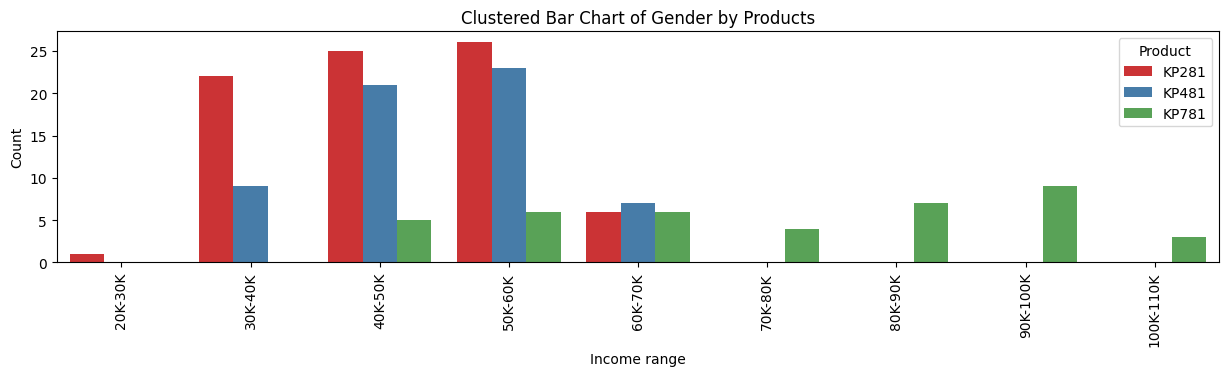

In [ ]:
plt.figure(figsize=(15, 3))
sns.countplot(x='Income', hue='Product', data=df, palette='Set1')
plt.xlabel('Income range')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Clustered Bar Chart of Gender by Products')

K281- Buyers of K281 have income range of 20K-70K

K481- Buyers of K481 have income range of 30K-70K

K781- Buyers of K781 have income range of 40K-110K

#Section 3.2 For categorical variables (10 Points)

***********************************************************
Pie chart of Gender, Product wise
***********************************************************

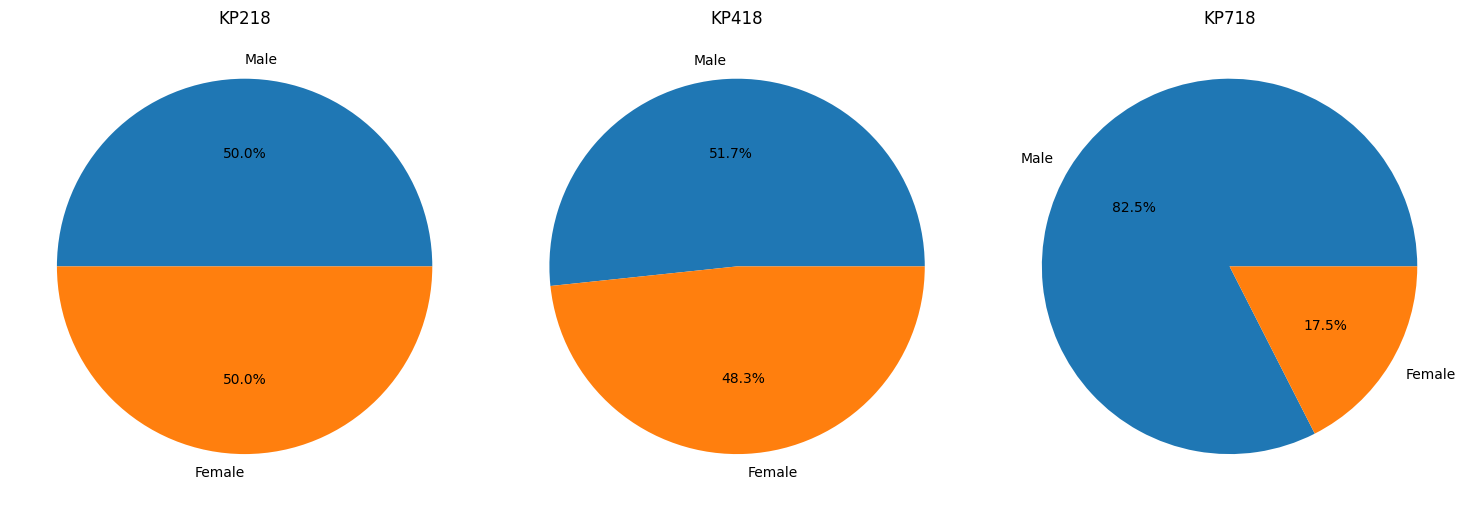

In [ ]:
kp281_total = df[df['Product']=="KP281"]
len_m = len(kp281_total[kp281_total["Gender"]=="Male"])
len_f = len(kp281_total[kp281_total["Gender"]=="Female"])
# Create a subplot 1
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
plt.subplot(1, 3, 1)  # Create the first subplot
plt.pie([len_m, len_f], labels =["Male", "Female", ], autopct = '%1.1f%%')
plt.title("KP218")


kp481_total = df[df['Product']=="KP481"]
len_m1 = len(kp481_total[kp481_total["Gender"]=="Male"])
len_f1 = len(kp481_total[kp481_total["Gender"]=="Female"])
# Create a subplot 2
plt.subplot(1, 3, 2)  # Create the second subplot
plt.pie([len_m1, len_f1], labels =["Male", "Female", ], autopct = '%1.1f%%')
plt.title("KP418")

kp781_total = df[df['Product']=="KP781"]
len_m2 = len(kp781_total[kp781_total["Gender"]=="Male"])
len_f2 = len(kp781_total[kp781_total["Gender"]=="Female"])
# Create a subplot 2
plt.subplot(1, 3, 3)  # Create the second subplot
plt.pie([len_m2, len_f2], labels =["Male", "Female", ], autopct = '%1.1f%%')
plt.title("KP718")

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

For KP218 and KP418 Male and Female customers are equal in ratio that is **1:1**

For KP781 Male and Female customers is 80:20 that is **4:1**

***********************************************************
Pie chart of MaritalStatus, Product wise
***********************************************************

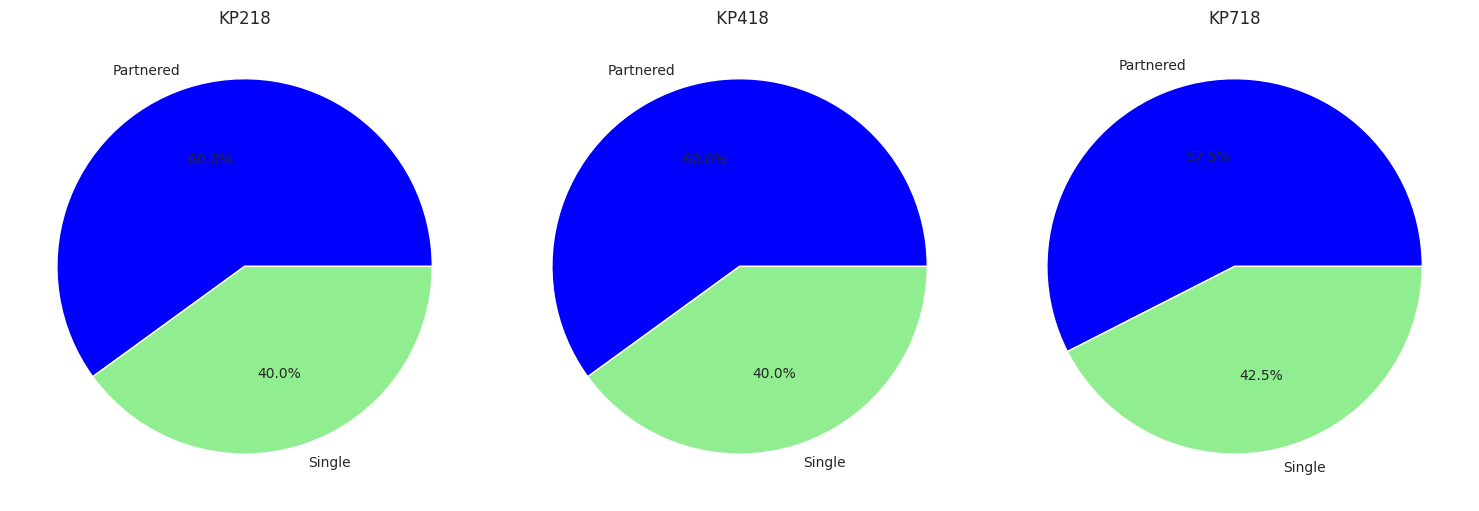

In [ ]:
kp281_total = df[df['Product']=="KP281"]
len_p = len(kp281_total[kp281_total["MaritalStatus"]=="Partnered"])
len_s = len(kp281_total[kp281_total["MaritalStatus"]=="Single"])
# Create a subplot 1
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
plt.subplot(1, 3, 1)  # Create the first subplot
plt.pie([len_p, len_s], labels =["Partnered", "Single" ], autopct = '%1.1f%%', colors = ['blue', 'lightgreen'])
plt.title("KP218")


kp481_total = df[df['Product']=="KP481"]
len_p1 = len(kp481_total[kp481_total["MaritalStatus"]=="Partnered"])
len_s1 = len(kp481_total[kp481_total["MaritalStatus"]=="Single"])
# Create a subplot 2
plt.subplot(1, 3, 2)  # Create the second subplot
plt.pie([len_p1, len_s1], labels =["Partnered", "Single", ], autopct = '%1.1f%%', colors = ['blue', 'lightgreen'] )
plt.title(" KP418")

kp781_total = df[df['Product']=="KP781"]
len_p2 = len(kp781_total[kp781_total["MaritalStatus"]=="Partnered"])
len_s2 = len(kp781_total[kp781_total["MaritalStatus"]=="Single"])
# Create a subplot 2
plt.subplot(1, 3, 3)  # Create the second subplot
plt.pie([len_p2, len_s2], labels =["Partnered", "Single", ], autopct = '%1.1f%%', colors = ['blue', 'lightgreen'] )
plt.title("KP718")

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

Irrespective of any Model of Treadmill, the ratio of Partnered and Single customer is **60:40** that is **3:2**

#Section 3.3 For correlation: Heatmaps, Pairplots(10 Points)

#Conditional and Marginal Probabilities

************************************************************
Gender vs Products
************************************************************

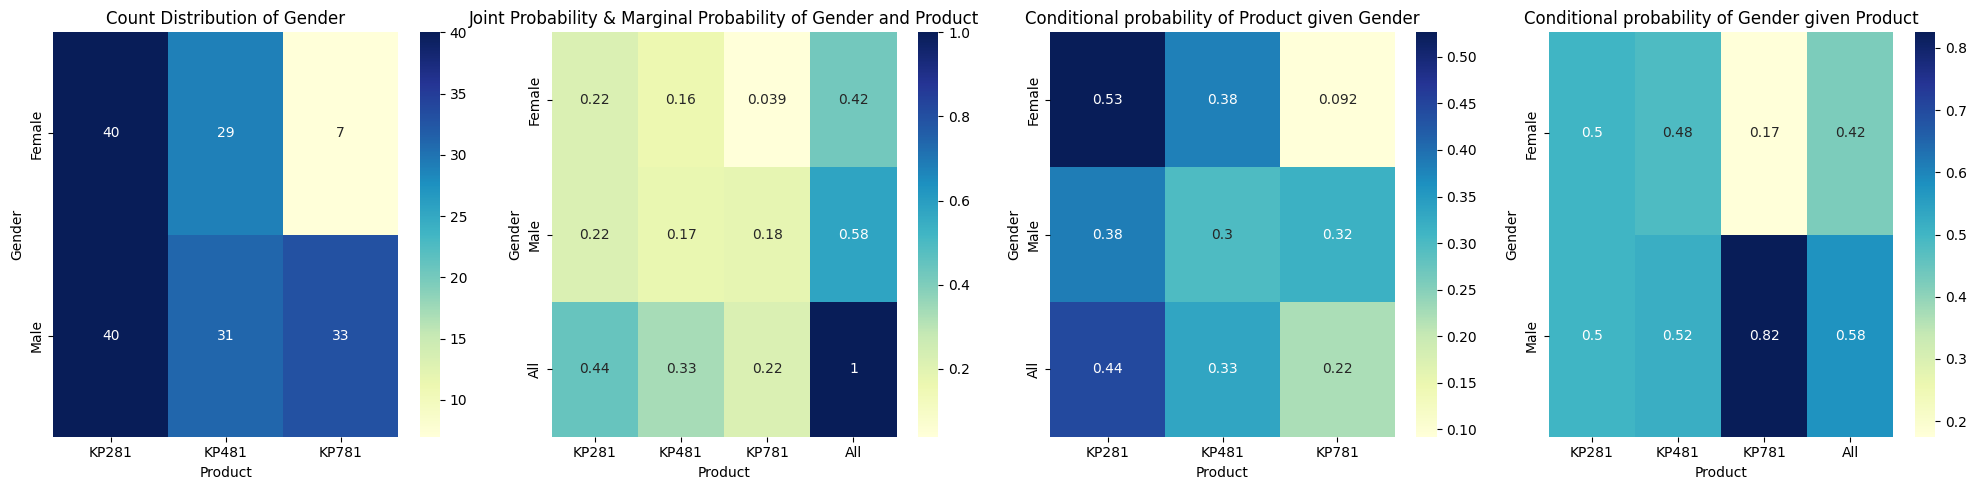

In [ ]:
# First Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(df["Gender"], df['Product'], normalize = False)
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
plt.subplot(1, 4, 1)  # Create the first subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Count Distribution of Gender')

# Second Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Gender"], columns = df['Product'], dropna=True,margins=True, normalize=True)
plt.subplot(1, 4, 2)  # Create the second subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Joint Probability & Marginal Probability of Gender and Product')

# Third Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Gender"], columns = df['Product'], dropna=True,margins=True, normalize="index")
plt.subplot(1, 4, 3)  # Create the third subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Product given Gender')

# Fourth Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Gender"], columns = df['Product'], dropna=True,margins=True, normalize="columns")
plt.subplot(1, 4, 4)  # Create the fourth subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Gender given Product')

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

Probability that a customer if wanted to buy KP281 and she is Female is 22%
Probability that a customer if wanted to buy KP281 and he is Male is also 22%

Probability that a customer if wanted to buy KP481 and she is Female is 16%
Probability that a customer if wanted to buy KP481 and he is Male is also 17%

Probability that a customer if wanted to buy KP781 and she is Female is 3%
Probability that a customer if wanted to buy KP781 and he is Male is also 18%

Probability that a customer will buy KP281 is 44%
Probability that a customer will buy KP281 is 33%
Probability that a customer will buy KP281 is 22%

Probability of a Male customer is 58%
Probability of a Femaleale customer is 42%





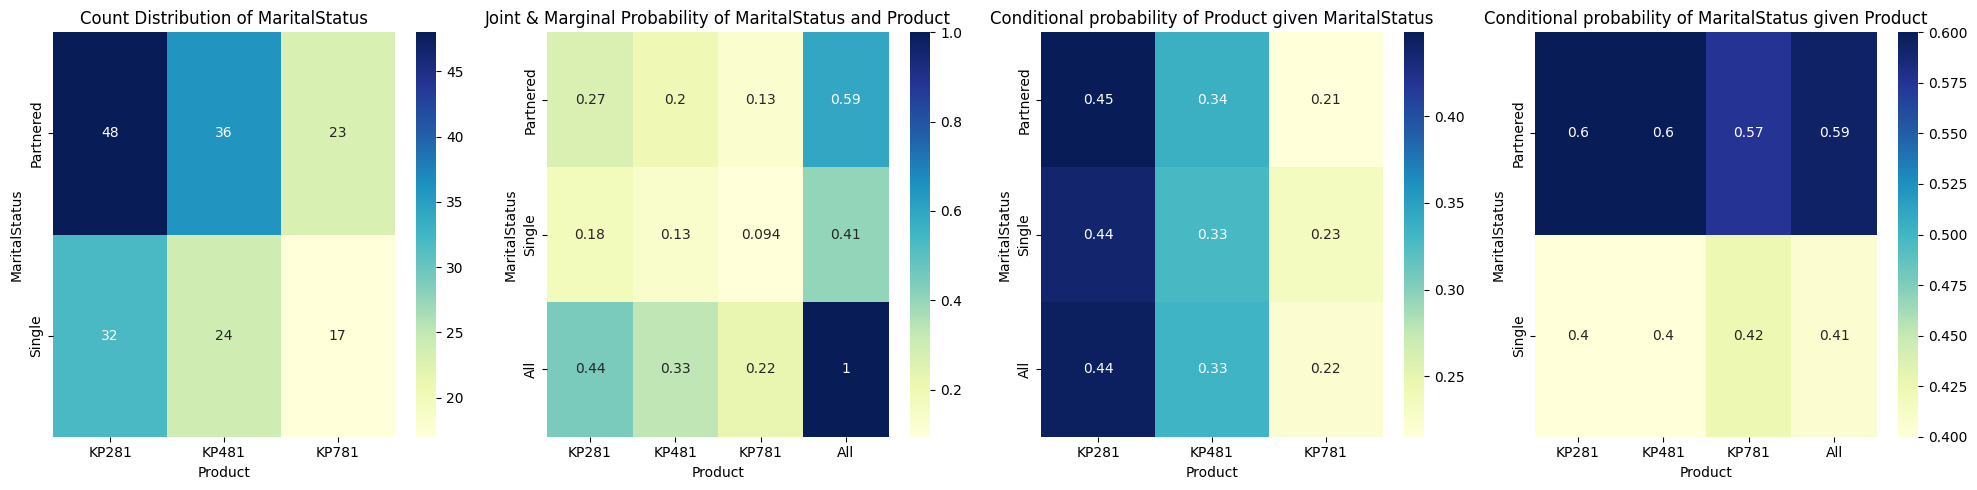

In [ ]:
# First Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(df["MaritalStatus"], df['Product'], normalize = False)
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
plt.subplot(1, 4, 1)  # Create the first subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Count Distribution of MaritalStatus')

# Second Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], dropna=True,margins=True, normalize=True)
plt.subplot(1, 4, 2)  # Create the second subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Joint & Marginal Probability of MaritalStatus and Product')

# Third Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], dropna=True,margins=True, normalize="index")
plt.subplot(1, 4, 3)  # Create the third subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Product given MaritalStatus')

# Fourth Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], dropna=True,margins=True, normalize="columns")
plt.subplot(1, 4, 4)  # Create the fourth subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of MaritalStatus given Product')

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

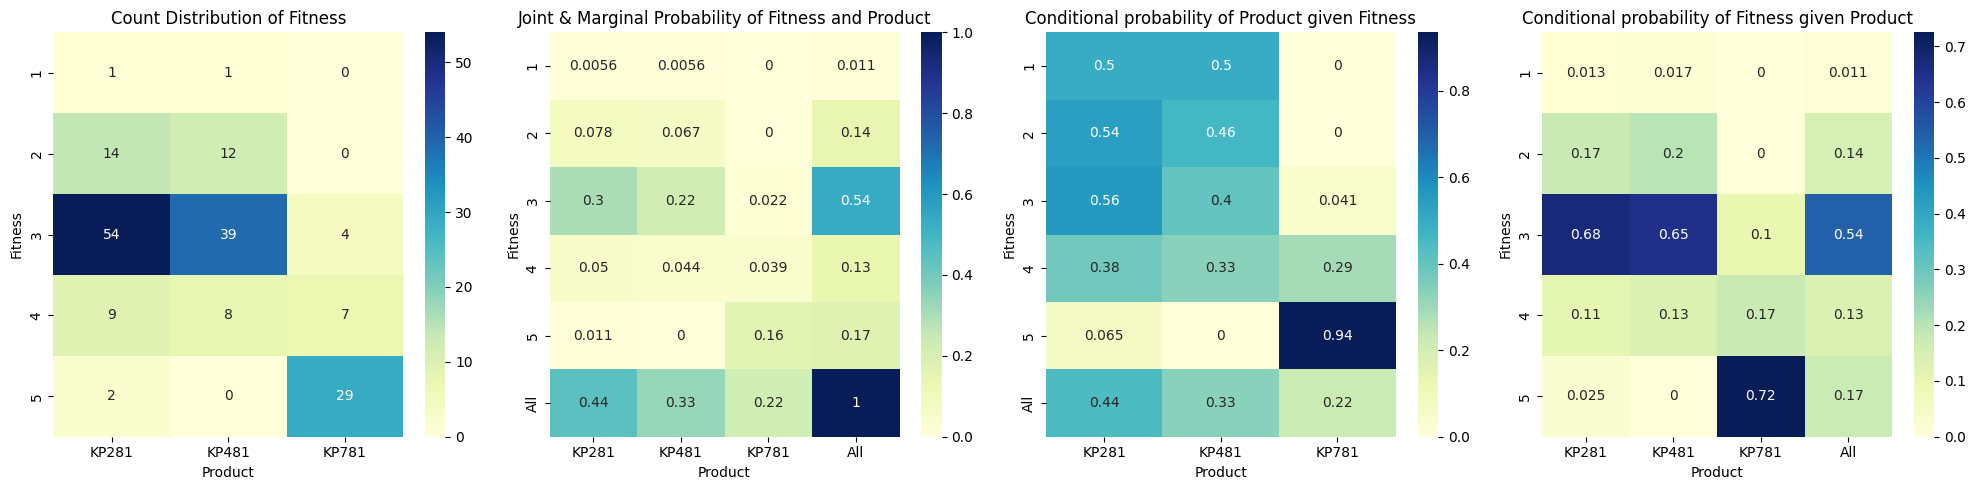

In [ ]:
# First Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(df["Fitness"], df['Product'], normalize = False)
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
plt.subplot(1, 4, 1)  # Create the first subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Count Distribution of Fitness')

# Second Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Fitness"], columns = df["Product"], dropna=True,margins=True, normalize=True)
plt.subplot(1, 4, 2)  # Create the second subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Joint & Marginal Probability of Fitness and Product')

# Third Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Fitness"], columns = df["Product"], dropna=True,margins=True, normalize="index")
plt.subplot(1, 4, 3)  # Create the third subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Product given Fitness')

# Fourth Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Fitness"], columns = df["Product"], dropna=True,margins=True, normalize="columns")
plt.subplot(1, 4, 4)  # Create the fourth subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Fitness given Product')

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

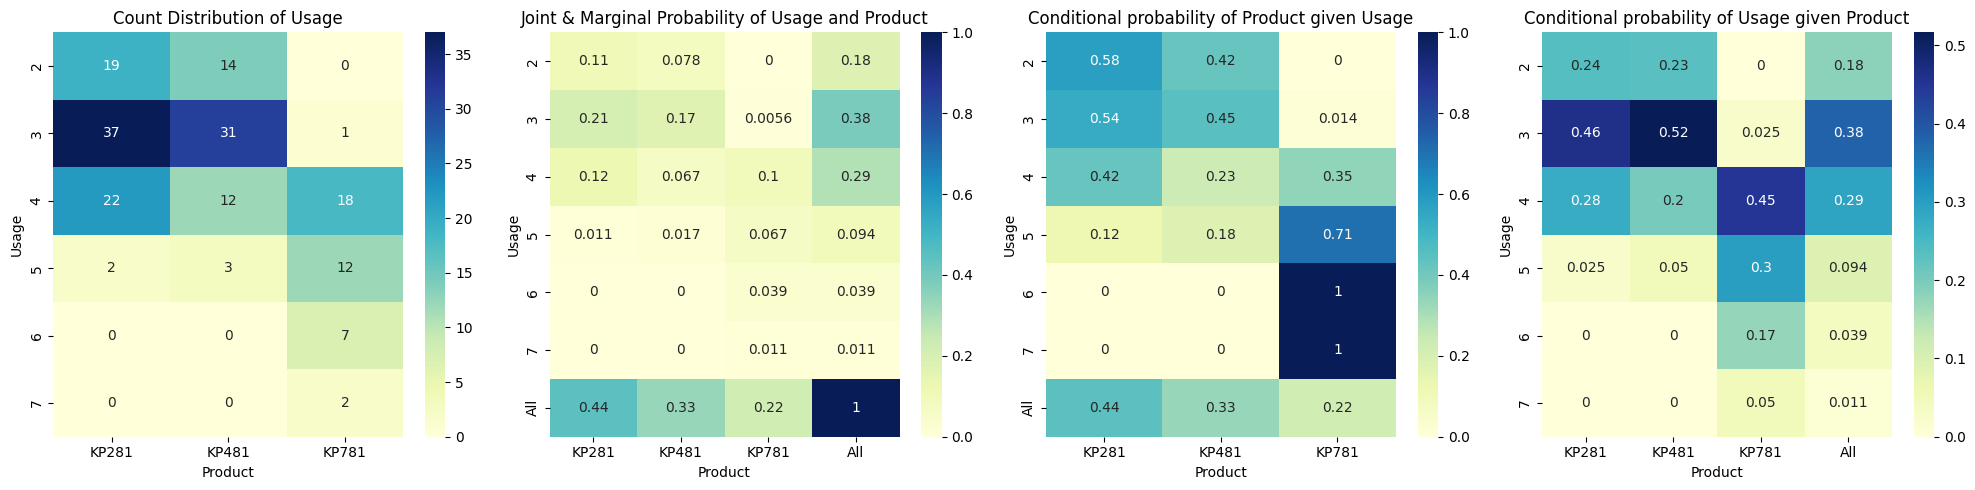

In [ ]:
# First Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(df["Usage"], df['Product'], normalize = False)
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
plt.subplot(1, 4, 1)  # Create the first subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Count Distribution of Usage')

# Second Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Usage"], columns = df["Product"], dropna=True,margins=True, normalize=True)
plt.subplot(1, 4, 2)  # Create the second subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Joint & Marginal Probability of Usage and Product')

# Third Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Usage"], columns = df["Product"], dropna=True,margins=True, normalize="index")
plt.subplot(1, 4, 3)  # Create the third subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Product given Usage')

# Fourth Graph of Count distribution between Gender and Product
contingency_table = pd.crosstab(index = df["Usage"], columns = df["Product"], dropna=True,margins=True, normalize="columns")
plt.subplot(1, 4, 4)  # Create the fourth subplot
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Conditional probability of Usage given Product')

plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()

# Correlation table

In [ ]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


We find Positive Correlation between:
1. Fitness and Age
2. income and Age
3. Income and education
4. Income & education
5. Fitness & usage
6. Income & usage
7. miles & usage
8. Income & Fitness
9. miles & fitness


#Section 5 Business Insights based on Non-Graphical and Visual Analysis (10 Points)

#**5.1 Comments on the range of attributes**
1.   Product - 3 unique products are there. KP281, KP481, KP781.
2.   Age - Range of age is 18-50
3.   Gender - 104 are Male and 76 are Female
4.   MaritalStatus - 107 are Partnered and 73 are Single
5.   Usage - Mode of usage is 3 times a week
6.   Fitness- Mode of fitness is 3
7. Income- range of Income is 20K-110K

#**5.2 Comments on the distribution of the variables and relationship between them**



**Product Analysis**

Products: KP281, KP481, and KP781
Unique Count: 80 for KP281, 60 for KP481, and 40 for KP781

**Demographic Insights - Age**
Age Range: 18-50 years
75th Percentile Age: 33 years

**Demographic Insights - Gender**
Male: 104 respondents (57%)
Female: 76 respondents (42%)

**Demographic Insights - Marital Status**
Partnered: 107 respondents (60%)
Single: 73 respondents (40%)

**Usage Patterns**
38% of customers plan to use the Treadmill 3 times a week
28% of customers plan to use the Treadmill 4 times a week

**Fitness Self-assessment**
53% of customers rate themselves as having a fitness level of 3 on a scale of 1 to 5.

**Income Distribution**
Income Range: $20,000 - $110,000
75th Percentile Income: Less than $59,000





#**5.3 Comments for each univariate and bivariate plot**

Given Below Every graph
------------------------------






#Section 6 Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.



Demographic Targeting:

Age Group: Since the 75th percentile age is 33, consider targeting marketing efforts towards this age group, as they might be more inclined to purchase the products.
Gender and Marital Status: Tailor marketing campaigns to resonate with both genders and consider specific messaging for partnered and single individuals. Understanding these demographics can help create more targeted advertising.

Income and Pricing Strategy:

Given the income distribution and the 75th percentile income being less than $59,000, ensure that your pricing strategy aligns with the income levels of your target audience. Consider offering financing options or budget-friendly packages to make your products accessible to a wider range of customers.




                                                                   **Solution of Problem Statemens**


#**Section 1.1 Answer** 1st Problem Statement. create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

#KP481 Customer Profiling:


*   Overall 18% Male and 17% Female will buy KP481. From all customers who are intreste to buy KP481, 52% are male and 48% are female.
*   Overall 20% Patnered and 13% Single will buy KP481. From all customers who are intreste to buy KP481, 60% are partnered and 40% are single.
* Overall age range of customer who are most likely to buy KP481 is 22-30.
* Customers who bought KP481, 65% of them rate themselves in fitness as 3 rating.
* Customers who bought KP481, 52% of them wanted to use it 3 time a week, 20% wanted to use 4 times a week and 23% wanted to use it 2 times a week.
(people who wante to use threadmill 2,3 or 4 times a week eqally likely to buy KP481 as much KP281)
*Customers intrested to buy KP481, 99% of them having income range of 30K-70K

#KP781 Customer Profiling:
*   Overall 18% Male and 4% Female will buy KP781. From all customers who are intreste to buy KP781, 82% are male and 17% are female.
*   Overall 13% Patnered and 9% Single will buy KP781. From all customers who are intreste to buy KP781, 60% are partnered and 40% are single.
* Overall age range of customer who are most likely to buy KP781 is 22-30.
* Customers who bought KP781, 72% of them rate themselves in fitness as 5 rating.
* Customers who bought KP781, 52% of them wanted to use it 4-6 times a week, 45% wanted to use 4 times a week and 30% wanted to use it 5 times a week, 17% wanted to use it 6 times a day.
(people who wante to use threadmill 4,5,6,7 times a week likely to buy KP481 KP781)
*Customers intrested to buy KP781, 99% of them having income range of 40K-110K

#**Section 1.2 Answer** 2nd Problem Statement.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
--------------------------------------------------------------------------------


Ans **Insights/Impact are with the Marginal and conditional Probability Graph**
-------------------------------------------------------------------------------